In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, auc

In [ ]:
link = "https://drive.google.com/file/d/146n1ih0lRrj8mQyvzsH3z3seY5wEoWEM/view?usp=sharing"
path = "https://drive.google.com/uc?id=" + link.split("/")[-2]
df = pd.read_csv(path)

# Verify shapes
print("Data Shape:", df.shape)

Data Shape: (100000, 28)


/tmp/ipython-input-4167538226.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## EDA

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Observations :
- There are missing values present in dataset.
- Train dataset has both numerical and string values.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x25fd5,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


Observations

- Customer_ID has 12500 unique values. It means we have data of 12500 customers.
- Month has only 8 unique values. Better to analyse further which months are present.
- Age has 1788 unique values. This looks strange as general age range is from 0-100.
- SSN has 12501 unique values, whereas Customer_ID only has only 12500 unique values. There is a possibility that incorrect SSN value is entered for one of the customer as same person can't have multiple SSN.

## Helper functions

In [ ]:
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [ ]:
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

In [ ]:
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column
    fill_missing_with_group_mode(df,groupby,column)

In [ ]:
def fix_inconsistent_values(df, groupby, column):

    # --- 0. Pre-Checks and Safety Conversions ---
    # Ensure column is numeric before proceeding (coercing any non-numeric left to NaN)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    # --- 1. Calculate Outlier Range (Safe Mode Calculation) ---

    # Calculate the group mode (local mode) for non-null values
    # Protects against an empty mode result with 'if not x.mode().empty'
    mode_series = df.groupby(groupby)[column].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )

    # Calculate the range of the modes. Use the column min/max as a fallback.
    mini = mode_series.min()
    maxi = mode_series.max()

    # Use overall column min/max if the mode calculation resulted in all NaNs
    if pd.isna(mini):
        mini = df[column].min()
    if pd.isna(maxi):
        maxi = df[column].max()

    # --- 2. Replace Outliers with NaN (Safe Assignment) ---
    # Identify values outside the calculated range [mini, maxi] OR less than 0
    is_outlier = (df[column] < mini) | (df[column] > maxi) | (df[column] < 0)

    # Safely replace outliers with NaN using .loc
    df.loc[is_outlier, column] = np.nan

    # --- 3. Impute ALL NaNs (Guaranteed Imputation) ---

    # 3a. Calculate the overall median (Robust global fallback)
    overall_median = df[column].median()

    # 3b. Impute NaNs using a chain of fallbacks:
    # 1. Fill with the 'mode_series' (local imputation).
    # 2. Fill ANY remaining NaNs with the 'overall_median' (guaranteed global imputation).
    df[column] = df[column].fillna(mode_series).fillna(overall_median)

    # --- 4. Final Checks and Datatype Conversion (Fixing the IndexError) ---

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

    # FIX: Safe check for final integer conversion flag (addresses the IndexError)
    target_col_name = f'{column}_target_type'
    if target_col_name in df.columns and not df.empty:
        # Check if the target type is 'int'. .iloc[0] is safe because we check for .empty
        if df[target_col_name].iloc[0] == 'int':

            # Final conversion to int (Must be done AFTER imputation)
            # Use .astype(pd.Int64Dtype()) for nullable integer, or .astype(int) for standard
            # We'll use standard int, but add a safety step for infs just in case.
            df[column] = df[column].replace([np.inf, -np.inf], overall_median).astype(int)

            del df[target_col_name]
            print(f"\nFinal conversion to {int} complete.")

In [ ]:
#Method to clean Numerical Field
def clean_numerical_field(df, groupby, column, strip=None, datatype=None, replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    # 1. Replace with np.nan (Garbage Value)
    if replace_value is not None:
        # Use .replace(..., inplace=False) and assign back to avoid warnings
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # 2. Convert to string and Remove trailing & leading special characters
    # We convert to string first to ensure .str.strip() works safely
    if strip is not None:
        df[column] = df[column].astype(str).str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # 3. FIX: Change datatype using pd.to_numeric with errors='coerce'
    if datatype is not None:
        # If the target is 'int', we first coerce to float, then convert to int later
        # (after NaNs are filled), as pd.to_numeric doesn't support a direct 'int' conversion with NaNs.
        df[column] = pd.to_numeric(df[column], errors='coerce')

        # If the target was 'int', we store a flag to do the final conversion
        if datatype == int or datatype == 'int':
            df[f'{column}_target_type'] = 'int'

        print(f"\nDatatype of {column} is changed to {pd.to_numeric(df[column], errors='coerce').dtype}")

    # 4. Handle Inconsistencies and Fill NaNs
    # fix_inconsistent_values will now receive a clean float series with NaNs ready for imputation
    fix_inconsistent_values(df, groupby, column)

    # 5. Final check for integer conversion (must happen AFTER imputation in fix_inconsistent_values)
    if f'{column}_target_type' in df.columns and df[f'{column}_target_type'].iloc[0] == 'int':
        # Convert to integer type, handling the float format first
        df[column] = df[column].astype(int)
        del df[f'{column}_target_type']
        print(f"\nFinal conversion to {int} complete.")

In [ ]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_distribution_hist(
    df: pd.DataFrame,
    column: str,
    user_friendly_column_name: str,
    rotation: int = 0,
    bins: int = 30,  # Increased default bins for potentially better detail
    color = 'skyblue'
) -> plt.Axes:
    """
    Plots the distribution of a numerical column using a histogram and KDE.

    Args:
        df: The pandas DataFrame.
        column: The name of the column to plot.
        user_friendly_column_name: A descriptive name for plot labels and title.
        rotation: The rotation angle for x-axis ticks.
        bins: Number of bins to use for the histogram.
        color: Optional. A specific color for the plot (e.g., 'skyblue').

    Returns:
        The matplotlib Axes object containing the plot.
    """
    print("\n-----------------------------------------------------")
    print(f'📊 Plotting Distribution for: {user_friendly_column_name}')

    # 1. Create the figure and axes
    plt.figure(figsize=(10, 6))

    # 2. Use histplot for axes-level plotting - it's more direct
    ax = sns.histplot(
        data=df,
        x=column,
        kde=True,
        bins=bins,
        color=color if color else sns.color_palette("deep")[0] # Use a single color from the 'deep' palette
    )

    # 3. Set labels and title
    ax.set_xlabel(user_friendly_column_name, fontsize=12)
    ax.set_ylabel('Frequency (Count)', fontsize=12) # More standard label is 'Frequency'
    ax.set_title(f'{user_friendly_column_name} Distribution (Histogram & KDE)', fontsize=14, fontweight='bold')

    # 4. Apply rotation
    plt.xticks(rotation=rotation)

    # 5. Show and return the plot object
    plt.tight_layout() # Adjusts plot to prevent labels from being cut off
    plt.show()

    return ax


In [ ]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

## Categorical feature

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

-----------------------------------------------------

Credit Score Distribution


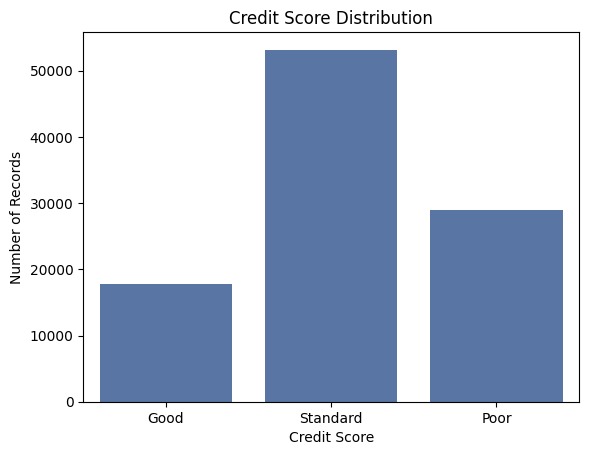

In [ ]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

#Get Details
get_column_details(df,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [ ]:
#Get Details
get_column_details(df,'ID')

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  100000

Distribution of column:

ID
0x25fd5    1
0x25fd4    1
0x25fd3    1
0x25fd2    1
0x25fd1    1
          ..
0x1606     1
0x1605     1
0x1604     1
0x1603     1
0x1602     1
Name: count, Length: 100000, dtype: int64


In [ ]:
#Get Details
get_column_details(df,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0x1d18    8
             ..
CUS_0x4157    8
CUS_0x5407    8
CUS_0x284a    8
CUS_0x95ee    8
CUS_0x1cdb    8
Name: count, Length: 12500, dtype: int64


In [ ]:
#Check if same customer can have different credit score
df.groupby(['Customer_ID'])['Credit_Score'].nunique()

,Credit_Score
Customer_ID,
CUS_0x1000,2
CUS_0x1009,1
CUS_0x100b,2
CUS_0x1011,1
CUS_0x1013,1
...,...
CUS_0xff3,2
CUS_0xff4,1
CUS_0xff6,2


Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

-----------------------------------------------------

Month & Credit_Score Distribution


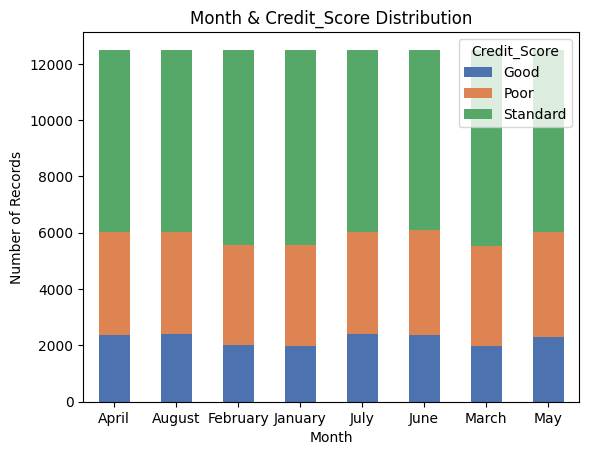

In [ ]:
column_name = 'Month'

#Get Details
get_column_details(df,column_name)

#Plot Distrbution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Score')

In [ ]:
#Convert Month to datetime object
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [ ]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name)

Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Name
Stevex                44
Langep                44
Vaughanl              39
Jessicad              39
Deepa Seetharamanm    38
                      ..
Bavierq                4
Alina Selyukhg         4
Janeman Latulf         4
Lucye                  4
Timothyl               3
Name: count, Length: 10139, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 9985

No. of missing values after filling with group mode: 0


In [ ]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  12501

Distribution of column:

SSN
#F%$D@*&8      5572
940-15-4402       8
571-35-3463       8
422-50-2476       8
430-60-9262       8
               ... 
604-62-6133       4
331-28-1921       4
838-33-4811       4
856-06-6147       4
753-72-2651       4
Name: count, Length: 12501, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 5572

No. of missing values after filling with group mode: 0


Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Occupation & Credit_Score Distribution


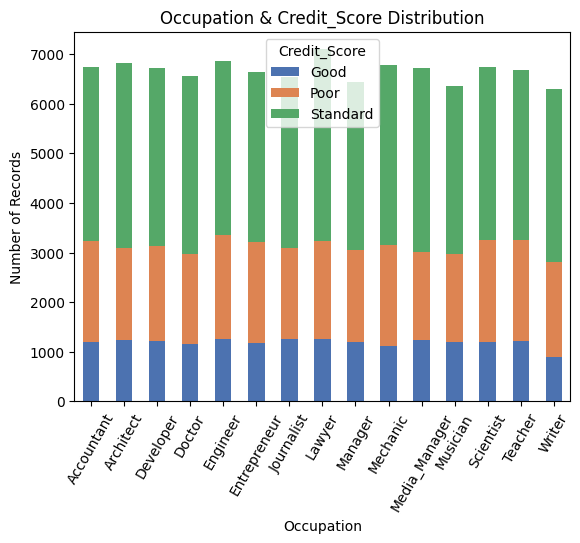

In [ ]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Score',rotation=60)

In [ ]:
#Get Details of Type of Loan column
get_column_details(df,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                                                    1408
Credit-Builder Loan                                                                                                              1280
Personal Loan                                                                                                                    1272
Debt Consolidation Loan                                                                                                          1264
Student Loan                                                                                                                     1240
                                                                                                                                 ... 
Debt Consolidation Loan, Personal Loan, Mort

In [ ]:
# Handle Type of Loan null values
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 20195

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Credit_Mix & Credit_Score Distribution


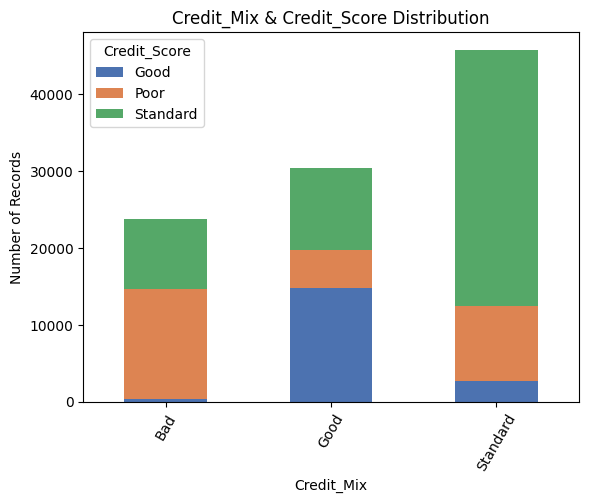

In [ ]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Score',rotation=60)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

-----------------------------------------------------

Payment_of_Min_Amount & Credit_Score Distribution


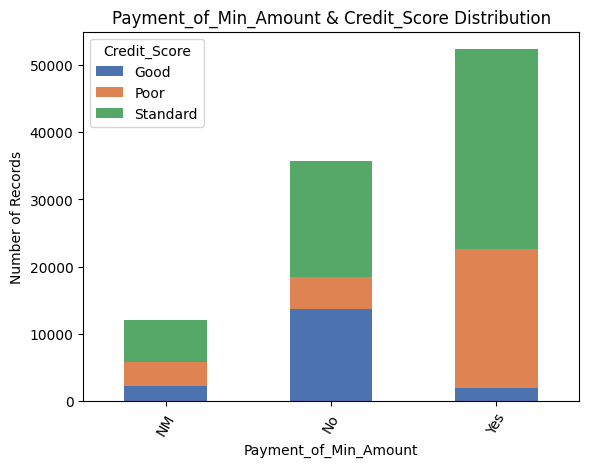

In [ ]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df,column_name)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Score',rotation=60)

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Payment_Behaviour & Credit_Score Distribution


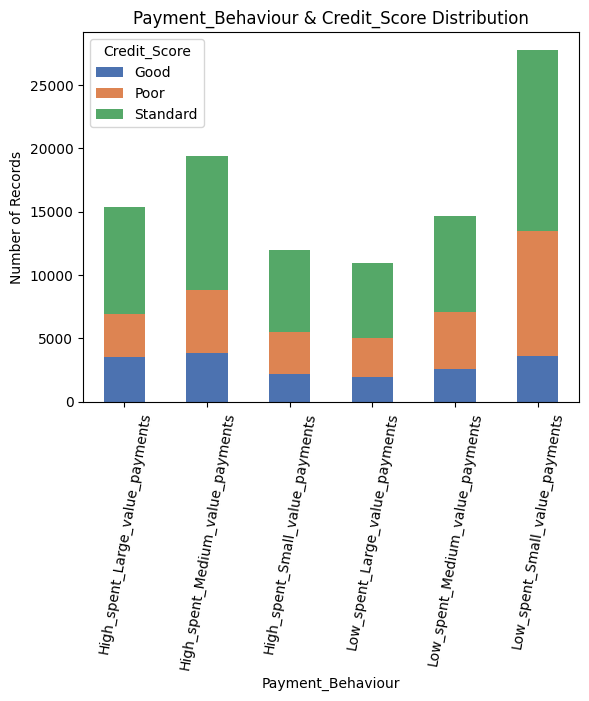

In [ ]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Score',rotation=80)

## Numerical features

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155       1
5063       1
2875       1
4347       1
Name: count, Length: 1788, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Age is changed to int64

Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

After Cleaning Min, Max Values:
min    14.0
max    56.0
Name: Age, dtype: float64

No. of Unique values after Cleaning: 43

No. of Null values after Cleaning: 0

Final conversion to <class 'int'> complete.

-----------------------------------------------------
📊 Plotting Distribution for: Age


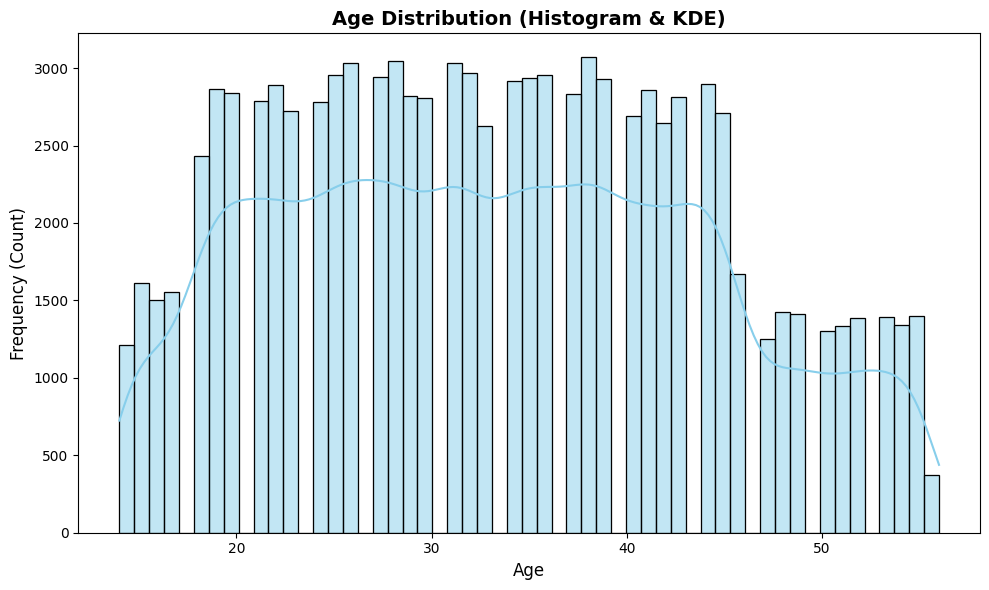

<Axes: title={'center': 'Age Distribution (Histogram & KDE)'}, xlabel='Age', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='int')

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,bins='auto')

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18940

Distribution of column:

Annual_Income
36585.12     16
20867.67     16
17273.83     16
95596.35     15
33029.66     15
             ..
3917169.0     1
89394.78_     1
36806.84_     1
24363.78_     1
95685.21_     1
Name: count, Length: 18940, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Annual_Income is changed to float64

Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

After Cleaning Min, Max Values:
min      7005.93
max    179987.28
Name: Annual_Income, dtype: float64

No. of Unique values after Cleaning: 12488

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Annual Income


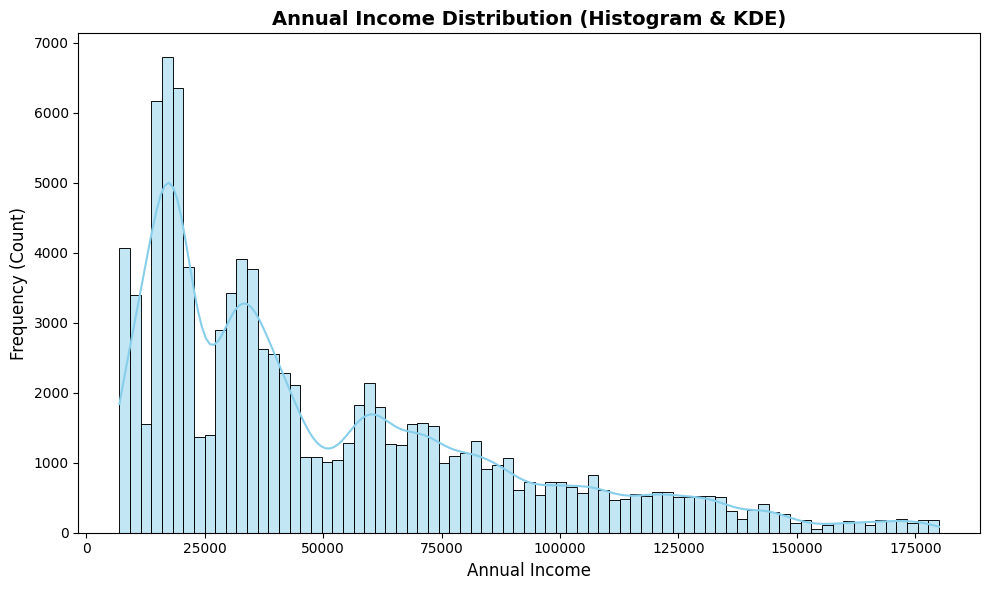

<Axes: title={'center': 'Annual Income Distribution (Histogram & KDE)'}, xlabel='Annual Income', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,bins='auto')

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

Monthly_Inhand_Salary
2295.058333    15
6082.187500    15
6358.956667    15
6769.130000    15
3080.555000    14
               ..
3415.781667     1
6272.739429     1
1069.950000     1
454.382083      1
2319.831269     1
Name: count, Length: 13235, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

After Cleaning Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

No. of Unique values after Cleaning: 13235

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Monthly Inhand Salary


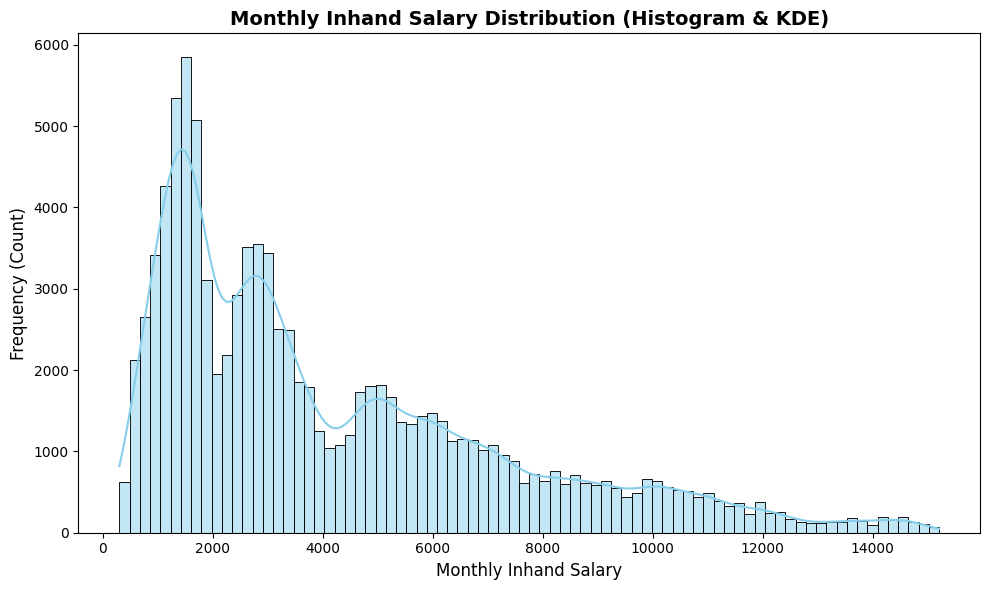

<Axes: title={'center': 'Monthly Inhand Salary Distribution (Histogram & KDE)'}, xlabel='Monthly Inhand Salary', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,bins='auto')

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  943

Distribution of column:

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1091        1
1123        1
1657        1
299         1
1240        1
Name: count, Length: 943, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

After Cleaning Min, Max Values:
min    -1.0
max    10.0
Name: Num_Bank_Accounts, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Bank Accounts Distribution


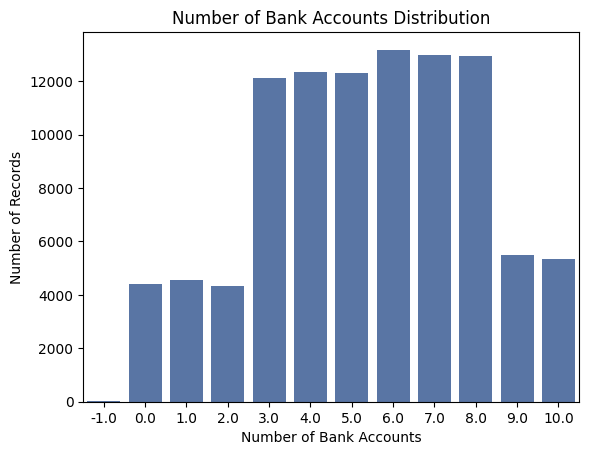

In [ ]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1179

Distribution of column:

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
1405        1
708         1
62          1
343         1
481         1
Name: count, Length: 1179, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

After Cleaning Min, Max Values:
min     0.0
max    11.0
Name: Num_Credit_Card, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Card Distribution


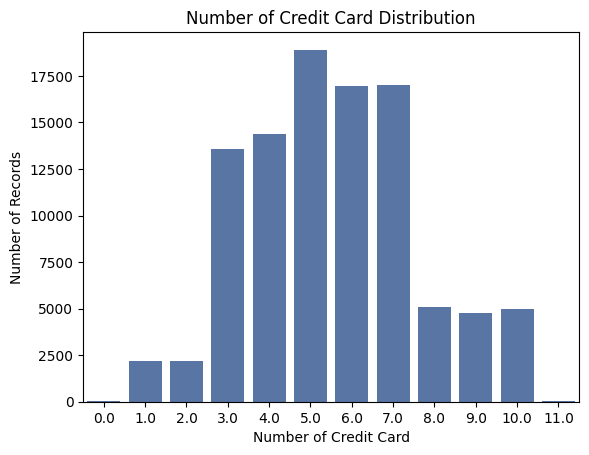

In [ ]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1750

Distribution of column:

Interest_Rate
8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
2548       1
967        1
3790       1
3782       1
4372       1
Name: count, Length: 1750, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       1
max    5797
Name: Interest_Rate, dtype: int64

After Cleaning Min, Max Values:
min     1.0
max    34.0
Name: Interest_Rate, dtype: float64

No. of Unique values after Cleaning: 34

No. of Null values after Cleaning: 0

-----------------------------------------------------

Interest Rate Distribution


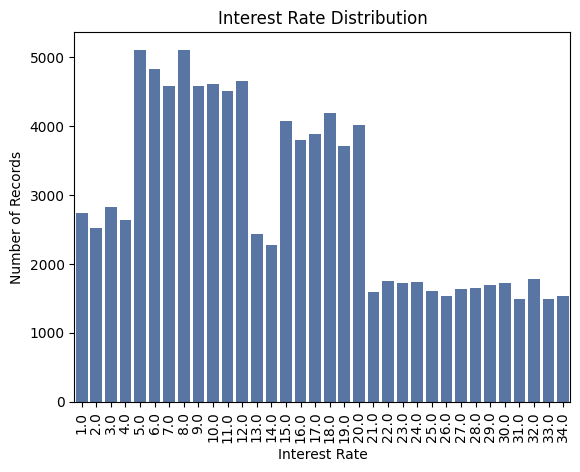

In [ ]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name,rotation=90)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

After Cleaning Min, Max Values:
min    -5.0
max    62.0
Name: Delay_from_due_date, dtype: float64

No. of Unique values after Cleaning: 68

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Delay from Due Date


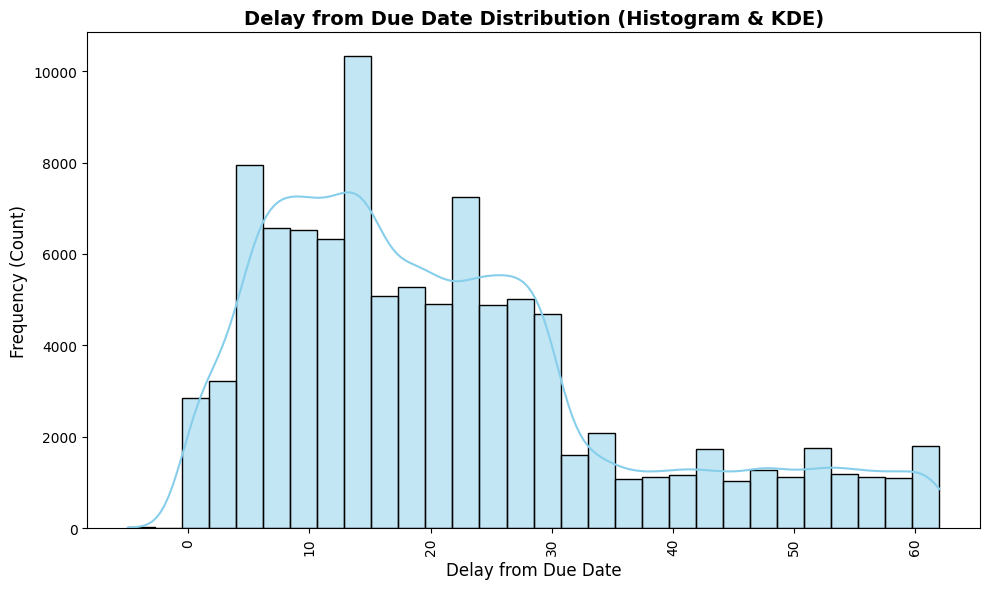

<Axes: title={'center': 'Delay from Due Date Distribution (Histogram & KDE)'}, xlabel='Delay from Due Date', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  object

There are  7002  null values

Number of Unique Values:  749

Distribution of column:

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
3845       1
4075       1
1502       1
1530       1
3011       1
Name: count, Length: 749, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to float64

Existing Min, Max Values:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64

After Cleaning Min, Max Values:
min    -2.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

No. of Unique values after Cleaning: 31

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Delayed Payment Distribution


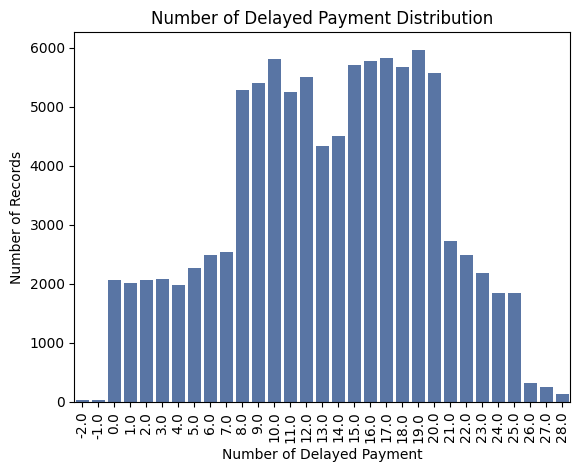

In [ ]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_countplot(df,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4384

Distribution of column:

Changed_Credit_Limit
_                    2091
8.22                  133
11.5                  127
11.32                 126
7.35                  121
                     ... 
30.16                   1
4.710000000000001       1
-4.39                   1
27.38                   1
16.63                   1
Name: count, Length: 4384, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Changed_Credit_Limit is changed to float64

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

After Cleaning Min, Max Values:
min    -5.01
max    29.98
Name: Changed_Credit_Limit, dtype: float64

No. of Unique values after Cleaning: 3525

No. of Null values after Cleaning: 0

----------------------------

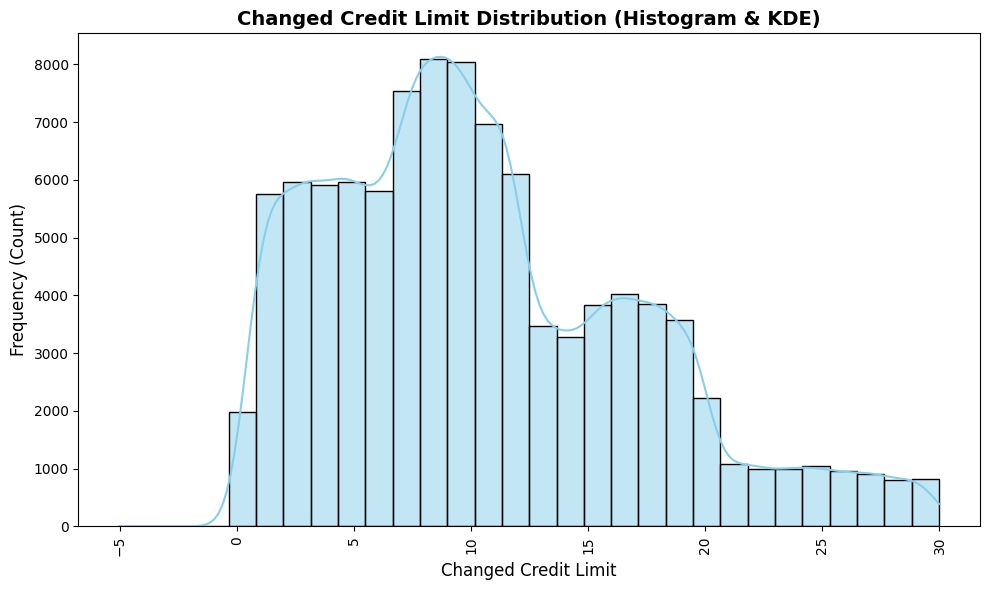

<Axes: title={'center': 'Changed Credit Limit Distribution (Histogram & KDE)'}, xlabel='Changed Credit Limit', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float',replace_value='_')

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1618.0        1
758.0         1
735.0         1
2483.0        1
1960.0        1
Name: count, Length: 1223, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

After Cleaning Min, Max Values:
min     0.0
max    17.0
Name: Num_Credit_Inquiries, dtype: float64

No. of Unique values after Cleaning: 18

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Inquiries Distribution


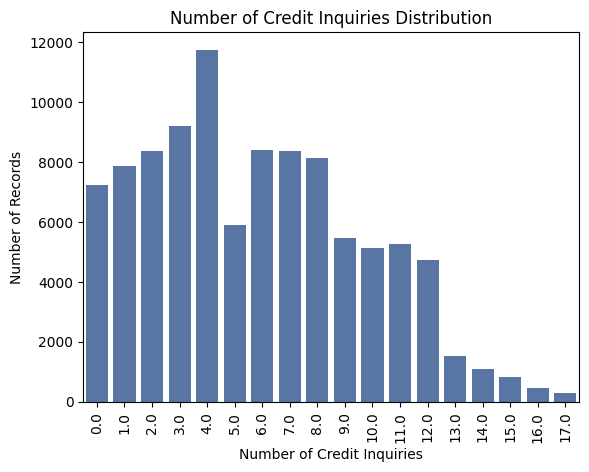

In [ ]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13178

Distribution of column:

Outstanding_Debt
1360.45     24
1151.7      23
460.46      23
1109.03     23
1329.59     16
            ..
1619.56_     1
297.64_      1
1264.42_     1
1617.55_     1
1324.1_      1
Name: count, Length: 13178, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to float64

Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

After Cleaning Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

No. of Unique values after Cleaning: 12203

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Outstanding Debt


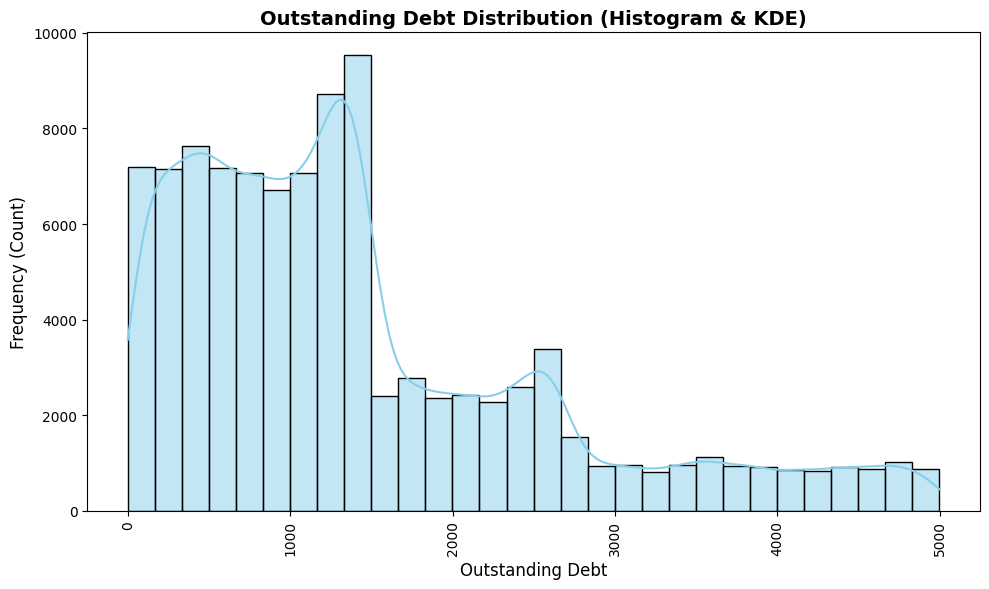

<Axes: title={'center': 'Outstanding Debt Distribution (Histogram & KDE)'}, xlabel='Outstanding Debt', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,rotation=90)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

Credit_Utilization_Ratio
39.300980    1
38.850680    1
37.753013    1
27.495263    1
36.979007    1
            ..
24.797347    1
31.377862    1
28.609352    1
31.944960    1
26.822620    1
Name: count, Length: 100000, dtype: int64

-----------------------------------------------------
📊 Plotting Distribution for: Credit Utilization Ratio


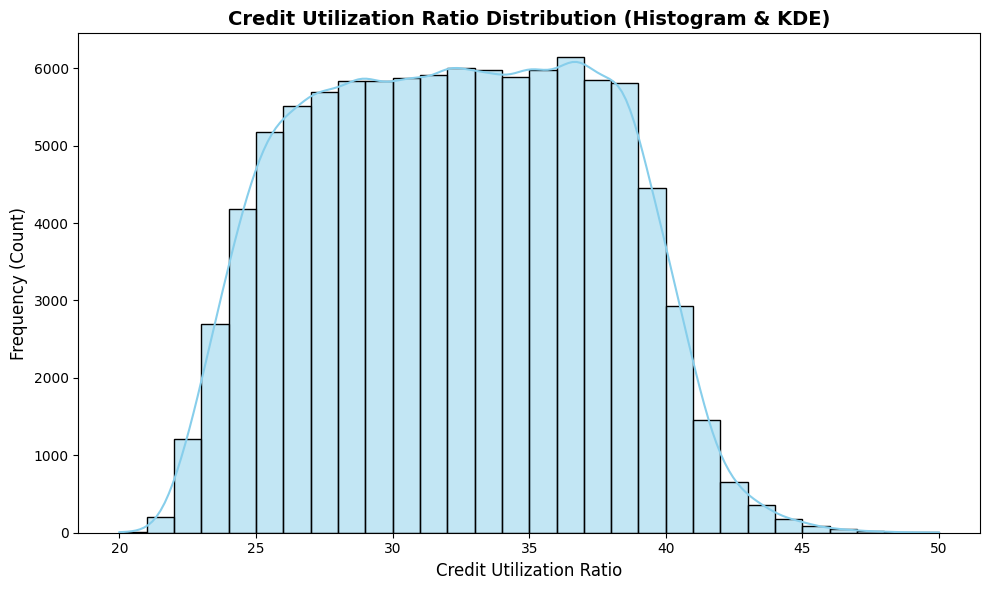

<Axes: title={'center': 'Credit Utilization Ratio Distribution (Histogram & KDE)'}, xlabel='Credit Utilization Ratio', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

#Get Details
get_column_details(df,column_name)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name)

In [ ]:
df['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,446
19 Years and 4 Months,445
19 Years and 5 Months,444
17 Years and 11 Months,443
19 Years and 3 Months,441
...,...
0 Years and 3 Months,20
0 Years and 2 Months,15
33 Years and 7 Months,14


In [ ]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

Details of Credit_History_Age column

DataType:  float64

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

Credit_History_Age
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Credit_History_Age is changed to float64

Existing Min, Max Values:
min      1.0
max    404.0
Name: Credit_History_Age, dtype: float64

After Cleaning Min, Max Values:
min      1.0
max    397.0
Name: Credit_History_Age, dtype: float64

No. of Unique values after Cleaning: 397

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Credit History Age


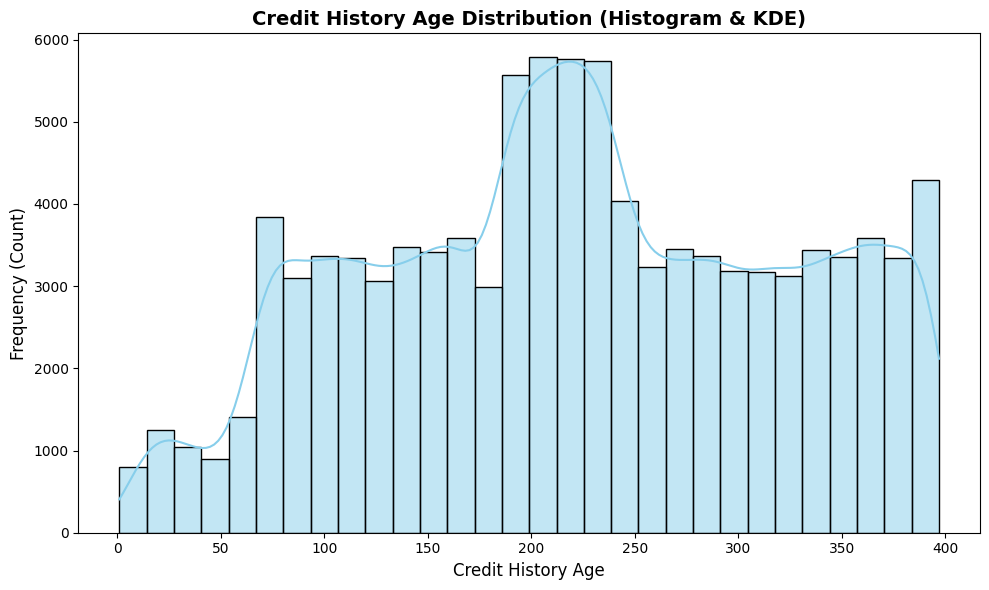

<Axes: title={'center': 'Credit History Age Distribution (Histogram & KDE)'}, xlabel='Credit History Age', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,datatype=float)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  14950

Distribution of column:

Total_EMI_per_month
0.000000        10613
135.133799          8
182.585183          8
427.144183          8
83.829111           8
                ...  
33746.000000        1
39347.000000        1
27292.000000        1
16627.000000        1
49430.000000        1
Name: count, Length: 14950, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

After Cleaning Min, Max Values:
min       0.000000
max    1779.103254
Name: Total_EMI_per_month, dtype: float64

No. of Unique values after Cleaning: 11890

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Total EMI per month


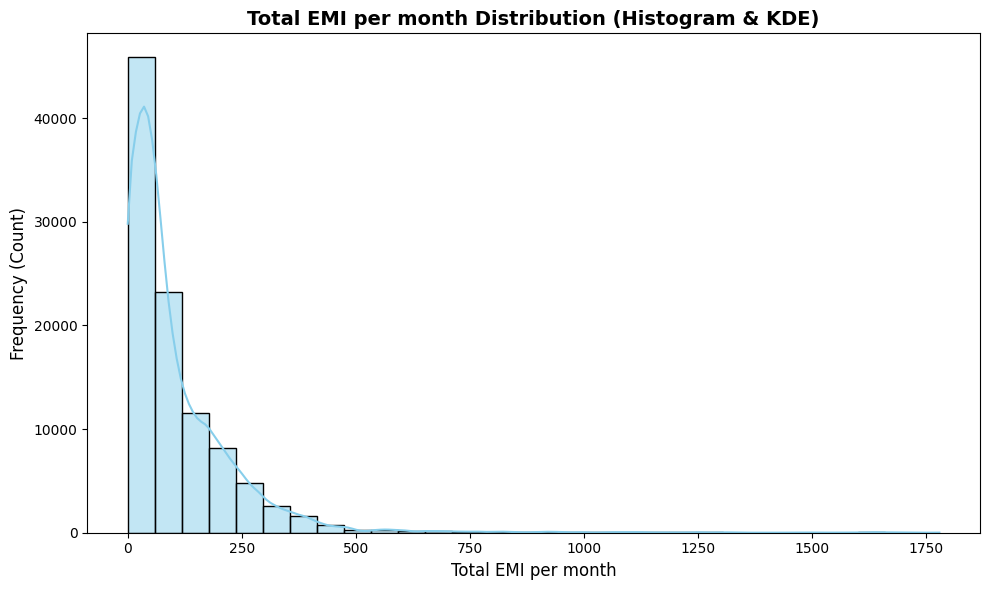

<Axes: title={'center': 'Total EMI per month Distribution (Histogram & KDE)'}, xlabel='Total EMI per month', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name)

Details of Amount_invested_monthly column

DataType:  object

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

Amount_invested_monthly
__10000__             4305
0.0                    169
59.93725850034815        1
165.180659491917         1
62.030802602004044       1
                      ... 
109.296681189146         1
33.6098814431885         1
76.87001005130772        1
908.6939096189257        1
401.35900899207513       1
Name: count, Length: 91049, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to float64

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

After Cleaning Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

No. of Unique values after Cleaning: 91049

No. of Null values after Cleaning: 0

----------------------------

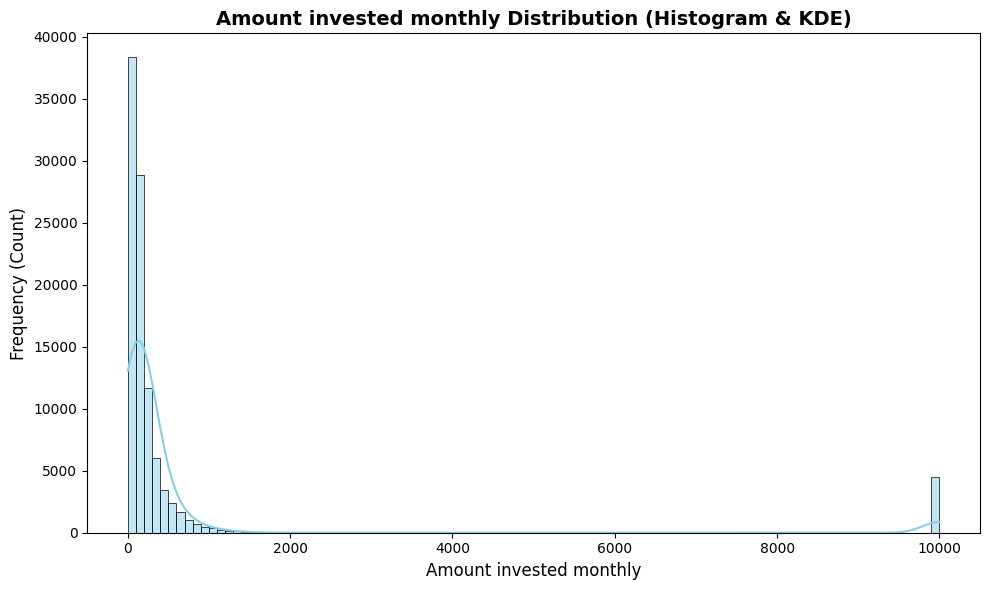

<Axes: title={'center': 'Amount invested monthly Distribution (Histogram & KDE)'}, xlabel='Amount invested monthly', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,datatype=float,strip='_')

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,bins=100)

Details of Monthly_Balance column

DataType:  object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

Monthly_Balance
__-333333333333333333333333333__    9
252.08489793906085                  1
254.9709216273975                   1
250.0931678204641                   1
289.7550752754317                   1
                                   ..
278.8720257394474                   1
376.7024623690405                   1
321.2336043357731                   1
373.29270287694055                  1
336.6371802877606                   1
Name: count, Length: 98792, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to float64

Existing Min, Max Values:
min       0.007760
max    1602.040519
Name: Monthly_Balance, dtype: float64

After Cleaning Min, Max Values:
min       0.007760

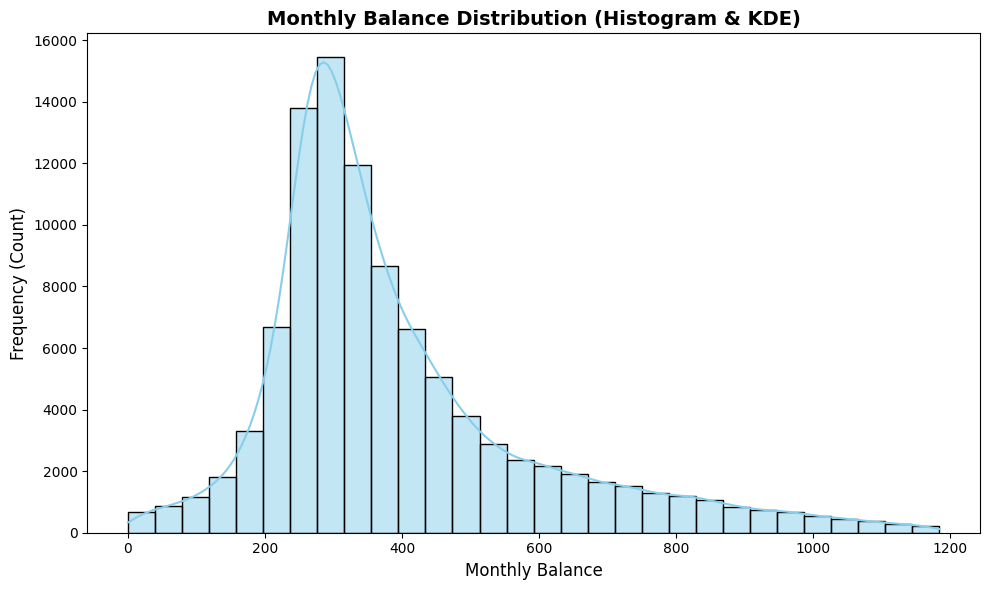

<Axes: title={'center': 'Monthly Balance Distribution (Histogram & KDE)'}, xlabel='Monthly Balance', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

#Get Details
get_column_details(df,column_name)

#Cleaning
df[column_name] = df[column_name].replace('', np.nan)
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,bins=30)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  434

Distribution of column:

Num_of_Loan
3      14386
2      14250
4      14016
0      10380
1      10083
       ...  
41         1
18         1
56         1
657        1
917        1
Name: count, Length: 434, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to int64

Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

After Cleaning Min, Max Values:
min    0.0
max    9.0
Name: Num_of_Loan, dtype: float64

No. of Unique values after Cleaning: 10

No. of Null values after Cleaning: 0

-----------------------------------------------------
📊 Plotting Distribution for: Number of Loan


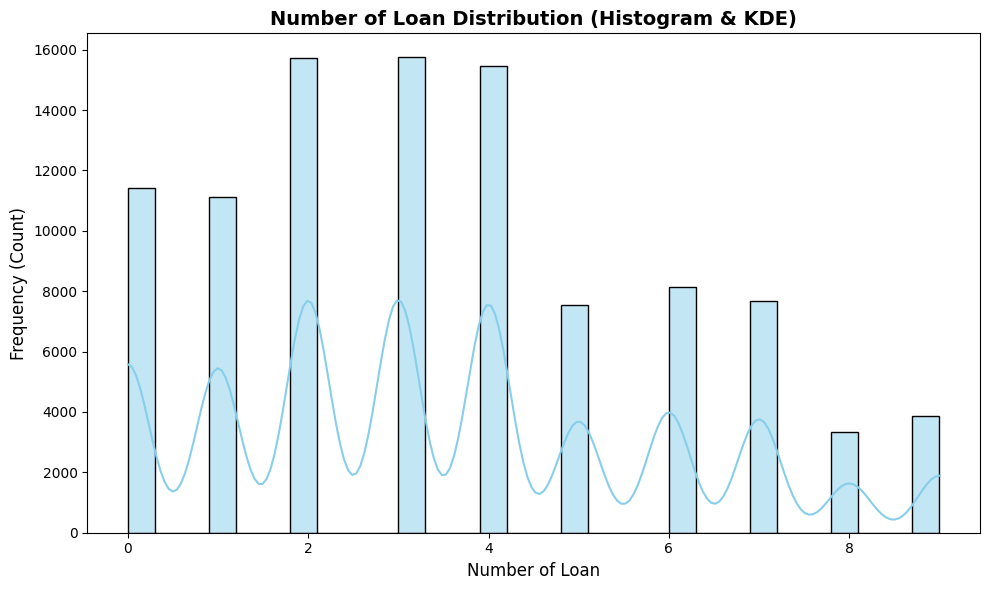

<Axes: title={'center': 'Number of Loan Distribution (Histogram & KDE)'}, xlabel='Number of Loan', ylabel='Frequency (Count)'>

In [ ]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_distribution_hist(df,column_name,user_friendly_name,bins=30)

In [ ]:
#Check if null values are present
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


Total numerical features selected: 18


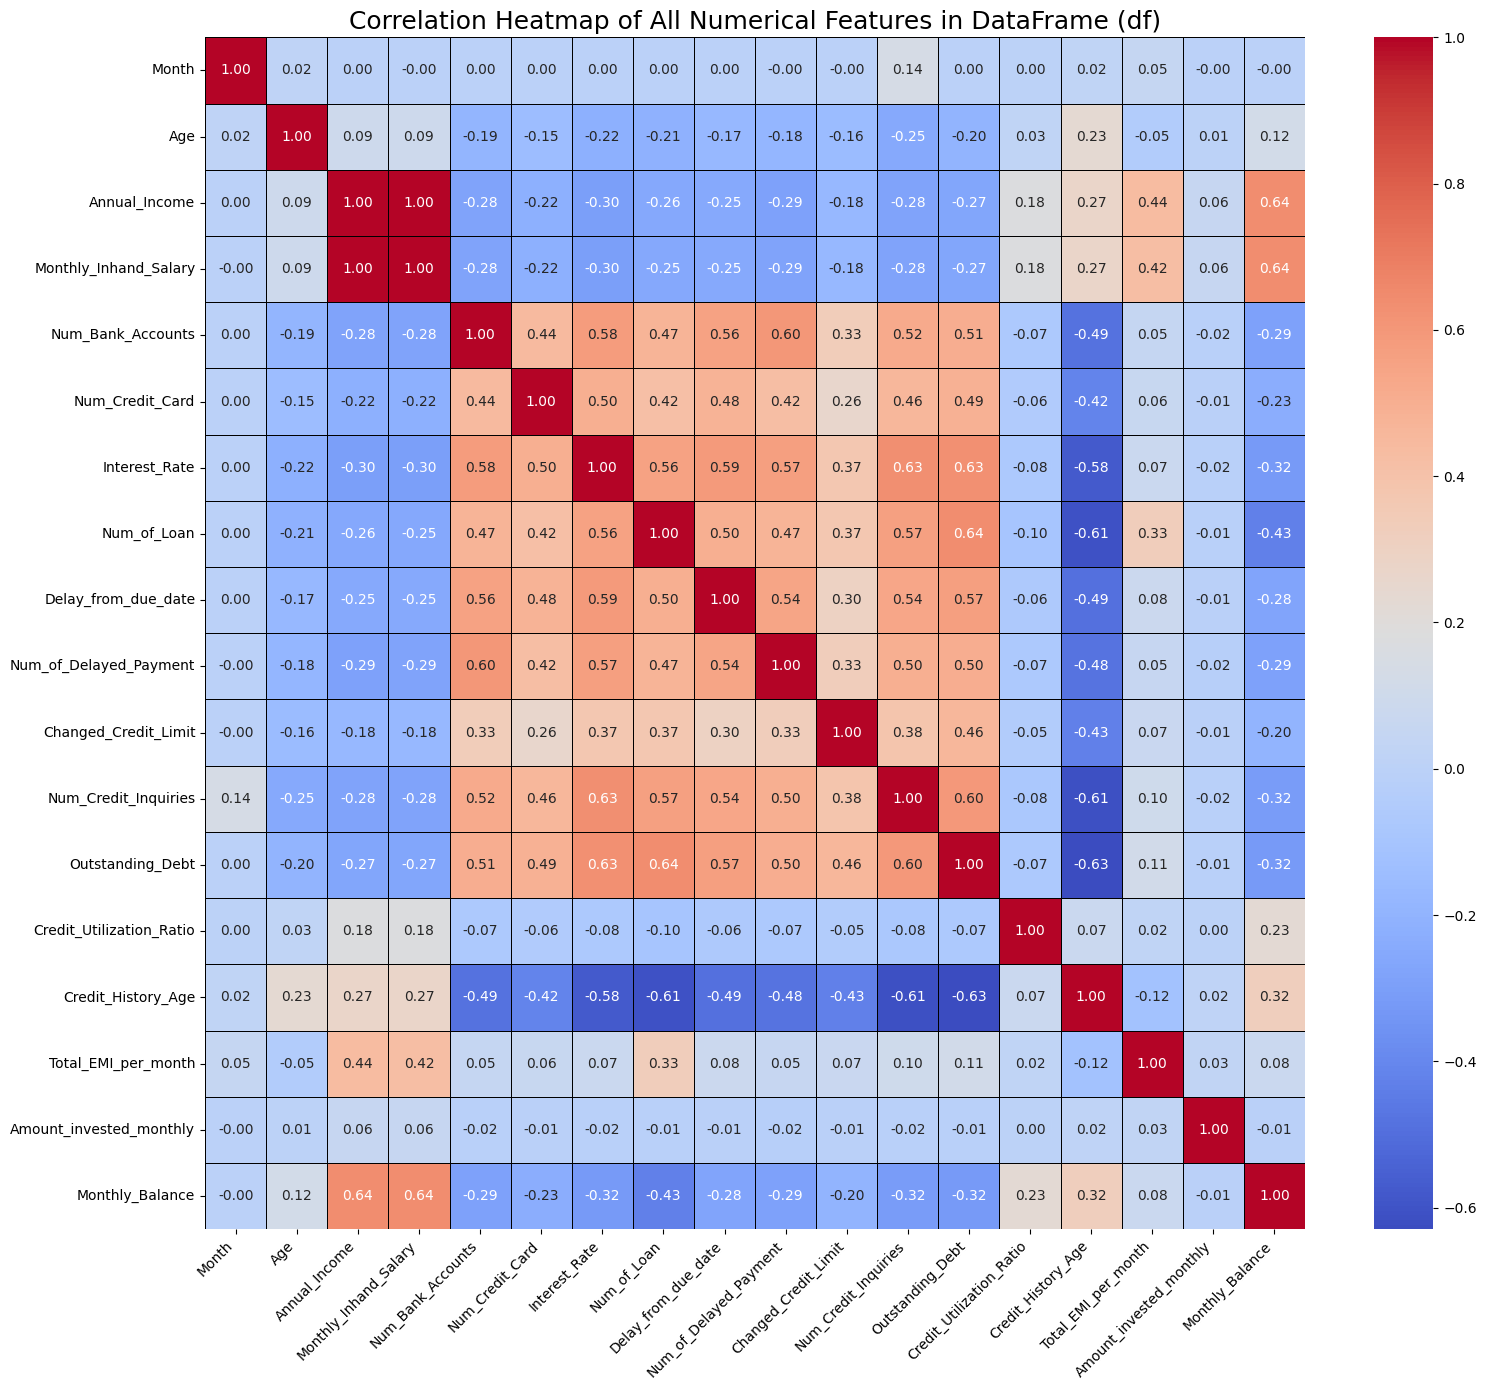

In [ ]:
# This ensures we exclude any string, object, or fully categorical columns.
df_numeric = df.select_dtypes(include=np.number)
print(f"Total numerical features selected: {df_numeric.shape[1]}")

# --- 2. Calculate the Correlation Matrix ---
# This computes the Pearson correlation coefficient for all pairs of selected numerical columns.
correlation_matrix = df_numeric.corr()

# --- 3. Create the Heatmap Visualization ---
plt.figure(figsize=(16, 14)) # Adjust size based on the number of features
sns.heatmap(
    correlation_matrix,
    annot=True,              # Display correlation values in the cells
    cmap='coolwarm',         # Ideal colormap for showing both positive and negative correlations
    fmt=".2f",               # Format values to two decimal places
    linewidths=0.5,          # Lines between cells
    linecolor='black',
    cbar=True
)

plt.title('Correlation Heatmap of All Numerical Features in DataFrame (df)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Data transfomation

In [ ]:
#Drop columns
print("Size of Dataset before dropping columns : ",df.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
df.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 24)


In [ ]:
# Fix 'Type_of_Loan' values
# Identify the problem column and set a limit for top categories
HIGH_CARDINALITY_COLUMN = 'Type_of_Loan'
TOP_K = 20 # Keep the 20 most frequent loan types

# 1. Calculate the list of top categories
top_categories = df[HIGH_CARDINALITY_COLUMN].value_counts().nlargest(TOP_K).index.tolist()

# 2. Apply grouping: replace categories outside the Top K with 'Other'
df[HIGH_CARDINALITY_COLUMN] = df[HIGH_CARDINALITY_COLUMN].apply(
    lambda x: x if x in top_categories else 'Other'
)

In [ ]:
categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

# Apply one-hot encoding to the specified categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the target variable
target_column = 'Credit_Score'

# Separate X and y before encoding
X = df.drop(columns=[target_column]).copy()
y = df[target_column].copy()

# Initialize and apply Label Encoding to the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"y (Target) shape after Label Encoding: {y_encoded.shape}")
print(f"y unique values (labels): {np.unique(y_encoded)}")
print(df['Credit_Score'].unique())

y (Target) shape after Label Encoding: (100000,)
y unique values (labels): [0 1 2]
['Good' 'Standard' 'Poor']


In [ ]:
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,"Type_of_Loan_Student Loan, and Payday Loan",Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,False,True,False,True,False,False,True,False,False,False
1,2,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,False,True,False,True,False,False,False,True,False,False
2,3,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,False,True,False,True,False,False,False,False,True,False
3,4,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,False,True,False,True,False,False,False,False,False,True
4,5,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,False,True,False,True,False,True,False,False,False,False


## Model training

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 61)
(20000, 61)
(80000,)
(20000,)


In [ ]:
# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Recommended for clarity, assuming X_train/X_test are DataFrame/Numpy arrays

# 1. Initialize the MinMaxScaler
scaler = MinMaxScaler()

# 2. Fit the scaler ONLY on the training data (X_train)
# This calculates the min and max for each feature based on the training data
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform BOTH the training and test data using the fitted scaler
# Use the same min and max values from the training set to avoid data leakage
X_test_scaled = scaler.transform(X_test)

# Optional: Convert back to DataFrame if X_train/X_test were DataFrames
# This step is often useful for subsequent operations or inspection
# (Assuming your original X had column names available, e.g., X_train.columns)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Shape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled test data:", X_test_scaled.shape)
print("\nExample of X_train_scaled (first row):", X_train_scaled[0])
print("Example of X_test_scaled (first row):", X_test_scaled[0])

Shape of scaled training data: (80000, 61)
Shape of scaled test data: (20000, 61)

Example of X_train_scaled (first row): [1.         0.5952381  0.44154049 0.4548046  0.36363636 0.81818182
 0.6969697  0.33333333 0.47761194 0.43333333 0.57587882 0.52941176
 0.52294991 0.2818522  0.37626263 0.06295892 0.01056245 0.61695373
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         1.         0.         0.         0.         0.
 0.        ]
Example of X_test_scaled (first row): [1.         0.33333333 0.03305209 0.05903177 0.45454545 0.63636364
 0.36363636 0.33333333 0.25373134 0.33333333 0.39496999 0.
 0.0775435  0.12823382 0.67676768 0.01645226 0.01213103 0.20925298
 0.         0.      

In [ ]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

# Define the scoring metrics you want to calculate
scoring = ['accuracy', 'precision_macro', 'recall_macro']

# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB', GaussianNB()),
    ('XGB', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')) # Added XGB defaults
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation once for all metrics
    cv_results = cross_validate(
        estimator=clf,
        X=X_train_scaled,
        y=y_train,
        cv=5,
        scoring=scoring,
        n_jobs=-1 # Use all available cores for parallel processing (can speed things up!)
    )

    # Extract and calculate average performance metrics
    avg_accuracy = np.mean(cv_results['test_accuracy'])
    avg_precision = np.mean(cv_results['test_precision_macro'])
    avg_recall = np.mean(cv_results['test_recall_macro'])

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.7251
Average Precision: 0.7077
Average Recall: 0.7062
-----------------------


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classifier: Random Forest
Average Accuracy: 0.8110
Average Precision: 0.8001
Average Recall: 0.8046
-----------------------


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classifier: KNN
Average Accuracy: 0.6700
Average Precision: 0.6406
Average Recall: 0.6468
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.4791
Average Precision: 0.5704
Average Recall: 0.5983
-----------------------
Classifier: XGB
Average Accuracy: 0.7712
Average Precision: 0.7558
Average Recall: 0.7608
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      3566
           1       0.81      0.84      0.83      5799
           2       0.85      0.82      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.81      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000


---------------------------------------------



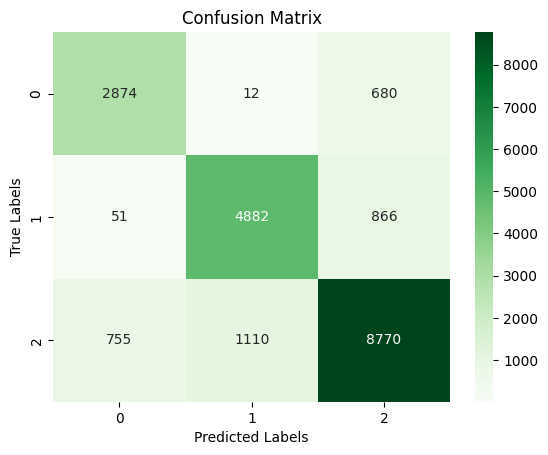

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the model
evaluate_model(y_test, y_pred)

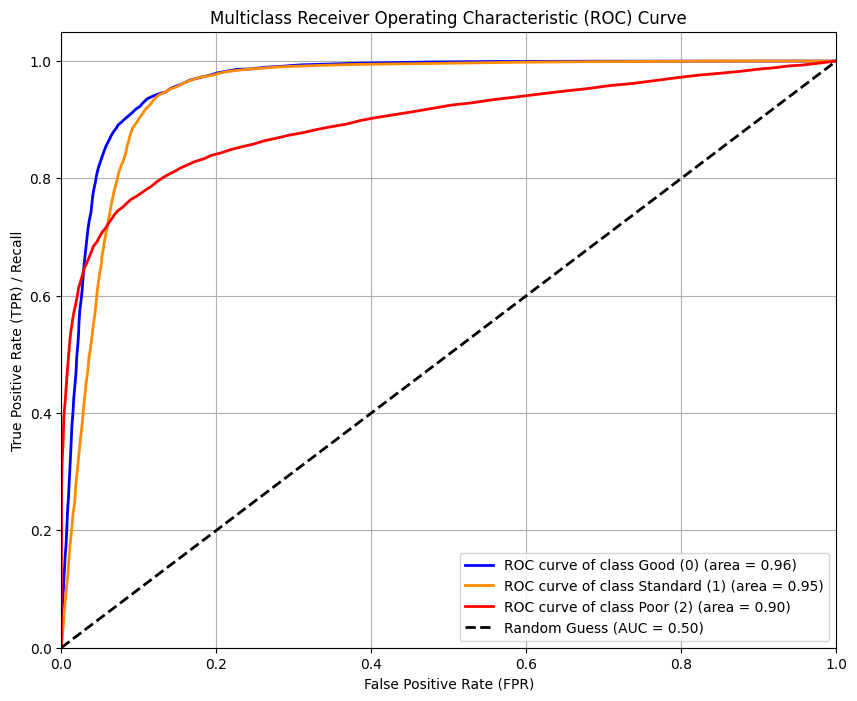


AUC for Class 0 (Good): 0.9642
AUC for Class 1 (Standard): 0.9495
AUC for Class 2 (Poor): 0.8956


In [ ]:
from itertools import cycle
# --- 2. Get Predicted Probabilities (Crucial for ROC) ---
# Use predict_proba to get the probability of each class for each instance
y_score = rf_classifier.predict_proba(X_test_scaled)

# --- 3. Binarize the Output (One-vs-Rest) ---
# Since y_test contains 0, 1, 2, we must convert it to a binary matrix
n_classes = 3 # We have 3 classes (Good, Standard, Poor)

# y_test_binarized will have a column for each class (e.g., [1, 0, 0] for class 0)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# --- 4. Calculate ROC curve and AUC for each class ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Calculate ROC curve metrics (False Positive Rate, True Positive Rate)
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    # Calculate Area Under the Curve (AUC)
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 5. Plotting the Multiclass ROC Curves ---
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'darkorange', 'red'])
class_names = ['Good (0)', 'Standard (1)', 'Poor (2)']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

# Plot the "No-Skill" or random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Optional: Print AUCs for confirmation ---
print(f"\nAUC for Class 0 (Good): {roc_auc[0]:.4f}")
print(f"AUC for Class 1 (Standard): {roc_auc[1]:.4f}")
print(f"AUC for Class 2 (Poor): {roc_auc[2]:.4f}")

## Optimize model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# --- 1. Define a wider, more flexible search space (Use distributions for continuous parameters) ---
# We use a wider range now that we are sampling randomly
params_random = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini']
}

# --- 2. Initialize Randomized Search ---
# We specify 'n_iter' to control the total number of combinations to test.
N_ITER_SEARCH = 10 # Test only 10 random combinations (instead of the 64 combinations in a full grid)

print(f"Starting RandomizedSearchCV, testing {N_ITER_SEARCH} combinations (5-fold CV = {N_ITER_SEARCH * 5} total fits)...")

random_para = RandomizedSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_distributions = params_random, # Use param_distributions, not param_grid
    n_iter = N_ITER_SEARCH,             # KEY: The number of parameter settings that are sampled
    cv = 2,
    n_jobs = -1,                        # Use all cores
    scoring = 'roc_auc_ovo_weighted',
    verbose = 1
)

# Run the search
random_para.fit(X_train_scaled, y_train)

# Access results using .best_estimator_ and .best_params_ (same as GridSearchCV)
best_rf = random_para.best_estimator_
print('\n======================================================')
print('Tuning Results (Randomized Search):')
print('best para:\n', random_para.best_params_)
print(f'best cross-validation score (ROC AUC):\n {random_para.best_score_:.4f}')

Starting RandomizedSearchCV, testing 10 combinations (5-fold CV = 50 total fits)...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

Tuning Results (Randomized Search):
best para:
 {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
best cross-validation score (ROC AUC):
 0.9035


## Evaluate

In [ ]:
# 1. Use the BEST model found to make predictions on the test set
y_pred_rf_best = random_para.best_estimator_.predict(X_test_scaled)

# 2. Get probabilities for ALL classes (necessary for multi-class AUC)
y_pred_proba_rf_best = random_para.best_estimator_.predict_proba(X_test_scaled)

# --- evaluation ---
acc = accuracy_score(y_test, y_pred_rf_best)

# Corrected AUC calculation for multi-class:
auc_score = roc_auc_score(
    y_true=y_test,
    y_score=y_pred_proba_rf_best,
    multi_class='ovr',   # Specify the multi-class strategy
    average='weighted'   # Aggregate results (e.g., macro, weighted)
)

cm = confusion_matrix(y_test, y_pred_rf_best)
report = classification_report(y_test, y_pred_rf_best)

# --- Print Results ---
print('\n======================================================')
print('TEST SET Evaluation (Best RandomizedSearchCV Model):')
print('Accuracy: ', f'{acc:.4f}')
print('AUC: ', f'{auc_score:.4f}')
print('Confusion matrix:\n', cm)
print('Classification report:\n', report)


TEST SET Evaluation (Best RandomizedSearchCV Model):
Accuracy:  0.8001
AUC:  0.9097
Confusion matrix:
 [[2881   17  668]
 [ 202 4555 1042]
 [ 944 1126 8565]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      3566
           1       0.80      0.79      0.79      5799
           2       0.83      0.81      0.82     10635

    accuracy                           0.80     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       0.80      0.80      0.80     20000



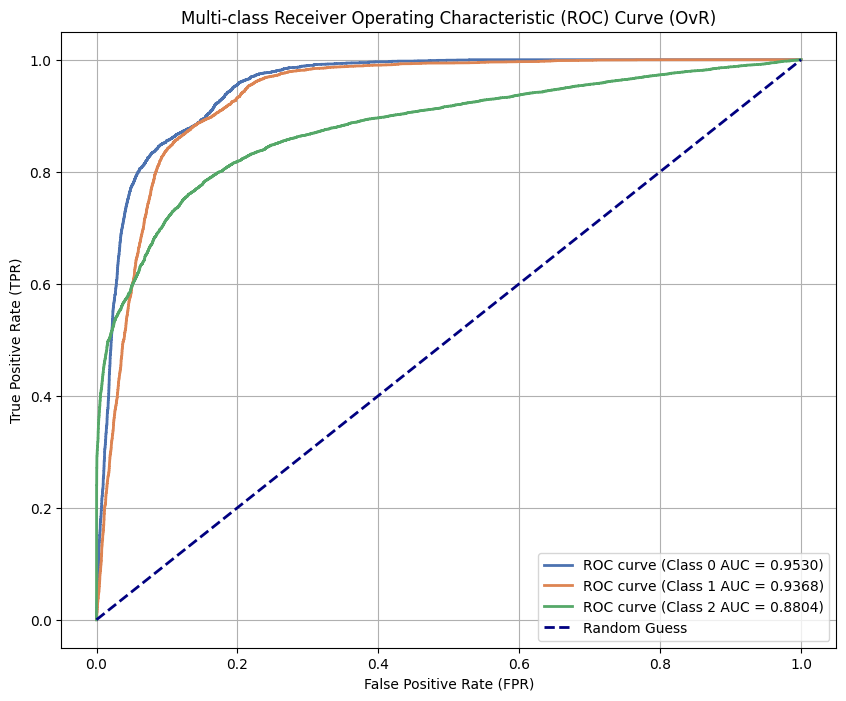

In [ ]:
# --- ROC AUC GRAPH INTEGRATION (Multi-Class OvR) ---
from sklearn.preprocessing import label_binarize

# Get the best estimator

best_estimator = random_para.best_estimator_

classes = best_estimator.classes_
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)

# Store results for each class
fpr = dict()
tpr = dict()
roc_auc = dict() # This dictionary stores the AUC score for EACH class

# The 'auc' function will now be callable because the variable 'auc' is gone.
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve (Class {classes[i]} AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve (OvR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Graph

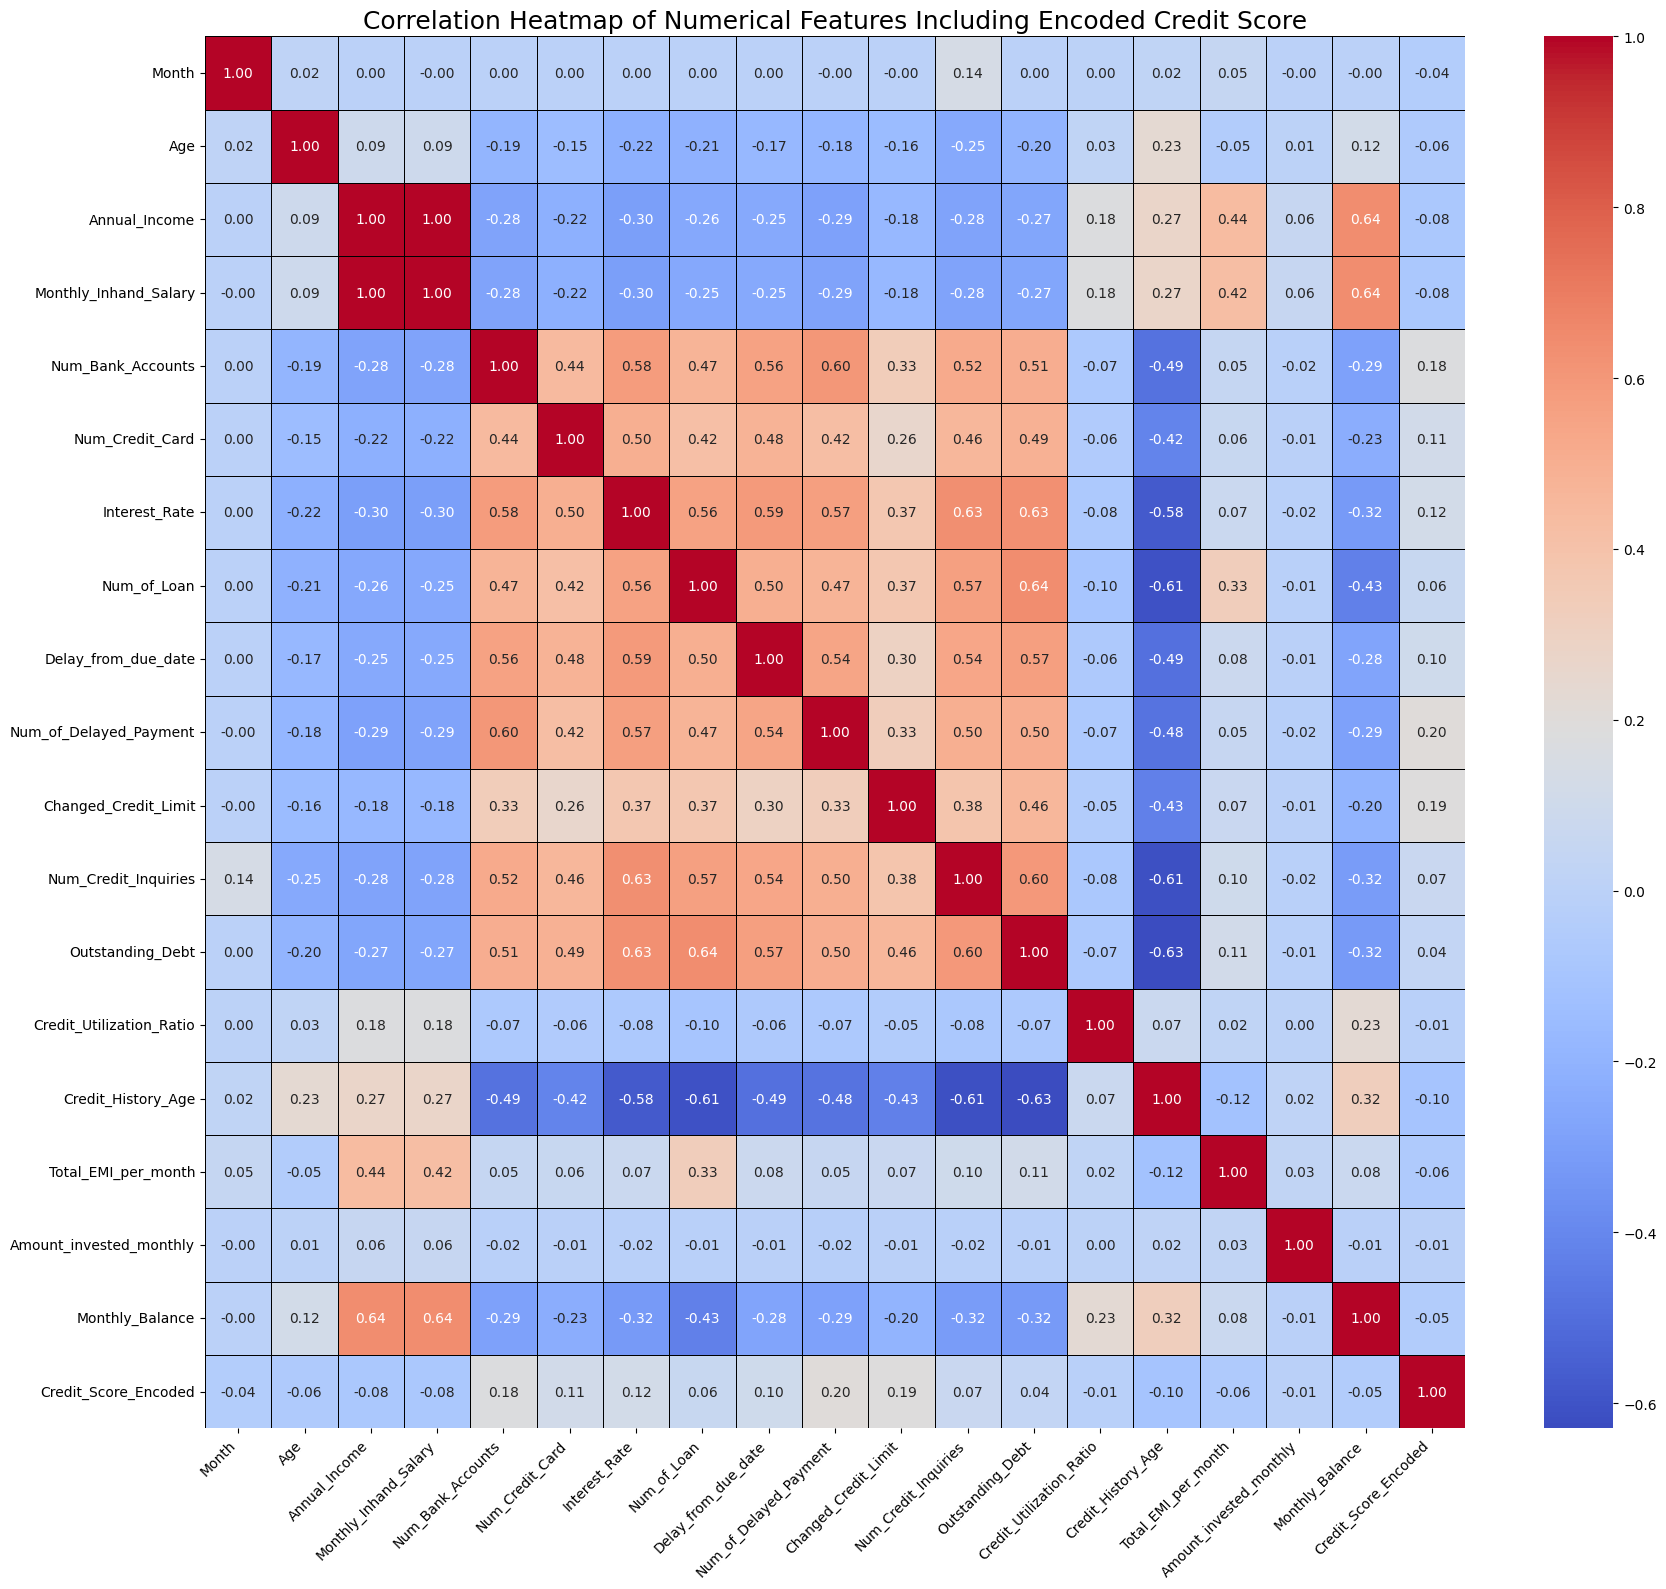

In [ ]:
# --- 1. Prepare the DataFrame with the Encoded Target ---

# Select only the numerical features from the original DataFrame
df_numeric = df.select_dtypes(include=np.number).copy()

# Add the numerically encoded Credit Score (y_encoded) to the DataFrame
# NOTE: Ensure y_encoded is aligned with the rows of df_numeric.
# If df is your original full DataFrame, this alignment should be fine.
df_numeric['Credit_Score_Encoded'] = y_encoded

# --- 2. Calculate the Correlation Matrix (including the target) ---
correlation_matrix = df_numeric.corr()

# --- 3. Create the Heatmap Visualization ---
plt.figure(figsize=(18, 16)) # Increased size to accommodate the new row/column
sns.heatmap(
    correlation_matrix,
    annot=True,              # Display correlation values
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    cbar=True
)

plt.title('Correlation Heatmap of Numerical Features Including Encoded Credit Score', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Ensure the encoded target is in the DataFrame
# Assuming df is your full OHE-encoded DataFrame:
df_ohe_with_target = df.copy()

# Add the numerically encoded Credit Score (y_encoded) to the DataFrame
# This step is critical: ensure y_encoded contains ONLY [0, 1, 2] integers.
df_ohe_with_target['Credit_Score_Encoded'] = y_encoded

# 2. Filter the DataFrame to include ONLY NUMERICAL columns
# This step bypasses the 'ValueError' by dropping any accidental string columns.
df_numeric_for_corr = df_ohe_with_target.select_dtypes(include=np.number)

# 3. Calculate correlations with the target variable
correlation_series = df_numeric_for_corr.corr()['Credit_Score_Encoded'].sort_values(ascending=False)

# 4. Exclude the perfect self-correlation (1.00)
correlation_series = correlation_series.drop('Credit_Score_Encoded')

# 5. Find the top 5 positive and top 5 negative correlations
top_positive = correlation_series.head(5)
top_negative = correlation_series.tail(5)

print("\n--- Top 5 Features Correlated with WORSE Credit Score (POSITIVE r) ---")
print(top_positive)

print("\n--- Top 5 Features Correlated with BETTER Credit Score (NEGATIVE r) ---")
print(top_negative)


--- Top 5 Features Correlated with WORSE Credit Score (POSITIVE r) ---
Num_of_Delayed_Payment    0.202123
Changed_Credit_Limit      0.189881
Num_Bank_Accounts         0.177432
Interest_Rate             0.121088
Num_Credit_Card           0.113338
Name: Credit_Score_Encoded, dtype: float64

--- Top 5 Features Correlated with BETTER Credit Score (NEGATIVE r) ---
Total_EMI_per_month     -0.058028
Age                     -0.058921
Monthly_Inhand_Salary   -0.078900
Annual_Income           -0.080700
Credit_History_Age      -0.102586
Name: Credit_Score_Encoded, dtype: float64


In [ ]:
# --- 2. Create the Corrected Plotting DataFrame (df_plot) ---
# Ensure ALL necessary columns are copied from the original df.
df_plot = df[['Credit_Utilization_Ratio', 'Outstanding_Debt', 'Credit_History_Age','Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Annual_Income','Num_Bank_Accounts']].copy()

Index(['Credit_Utilization_Ratio', 'Outstanding_Debt', 'Credit_History_Age',
       'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Annual_Income', 'Num_Bank_Accounts',
       'Credit_Score_Label'],
      dtype='object')


/tmp/ipython-input-904085019.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


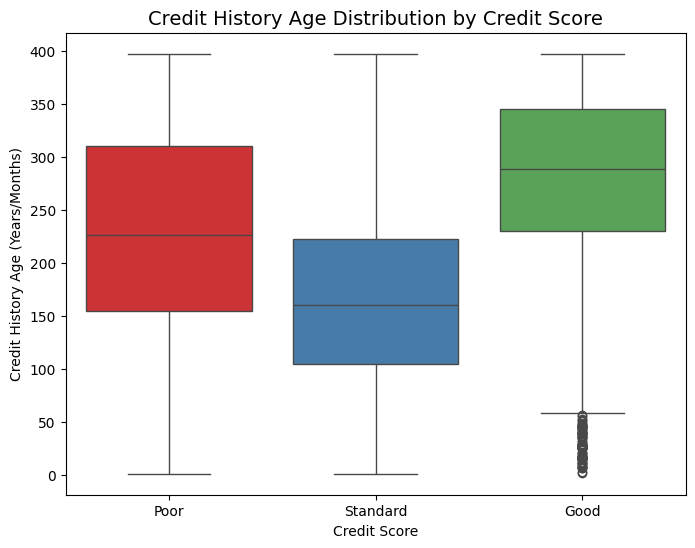

In [ ]:
# --- 1. Define Mapping (Re-use from previous step) ---
# Ensure your mapping is correct based on your encoding:
score_mapping = {
    0: 'Good',
    1: 'Standard',
    2: 'Poor'
}


# Add the encoded labels and map them back to strings
df_plot['Credit_Score_Label'] = y_encoded # Use the encoded numbers first
df_plot['Credit_Score_Label'] = df_plot['Credit_Score_Label'].map(score_mapping)

# Check the columns to confirm the fix
print(df_plot.columns) # Look for 'Credit_History_Age' in the output

# --- 3. Re-run the Box Plot Code ---

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Credit_History_Age', # This column now exists in df_plot
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='Set1'
)
plt.title('Credit History Age Distribution by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Credit History Age (Years/Months)')
plt.show()

/tmp/ipython-input-2232632279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


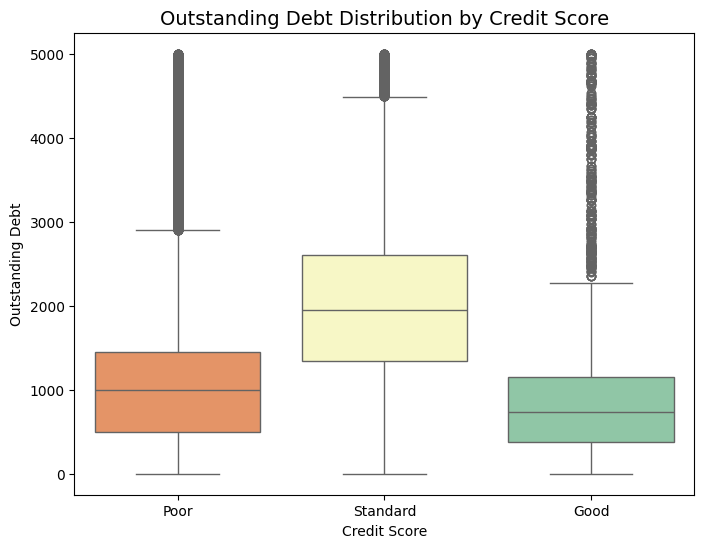

In [ ]:
# Assuming df_plot is the DataFrame prepared earlier with 'Credit_Score_Label'
# and 'Outstanding_Debt' is included.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Outstanding_Debt',
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='Spectral'
)
plt.title('Outstanding Debt Distribution by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

/tmp/ipython-input-1456702274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


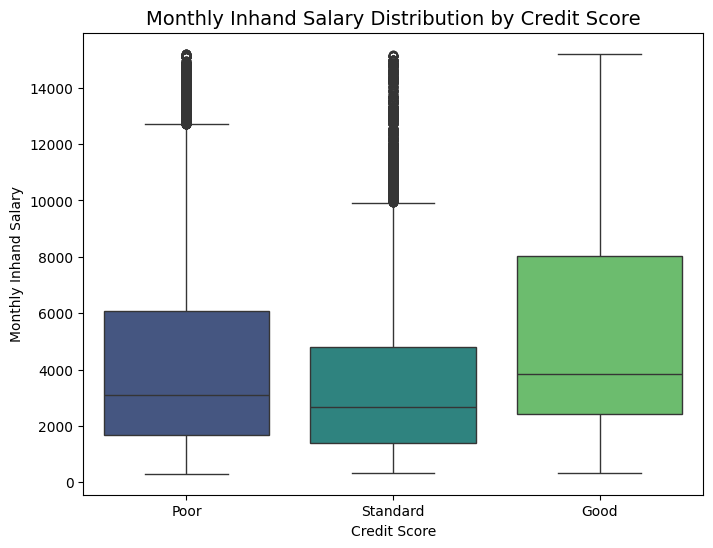

In [ ]:
# Assuming df_plot is the DataFrame prepared earlier with 'Credit_Score_Label'
# and 'Monthly_Inhand_Salary' is included.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Monthly_Inhand_Salary',
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='viridis'
)
plt.title('Monthly Inhand Salary Distribution by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary')
plt.show()

/tmp/ipython-input-2111828020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


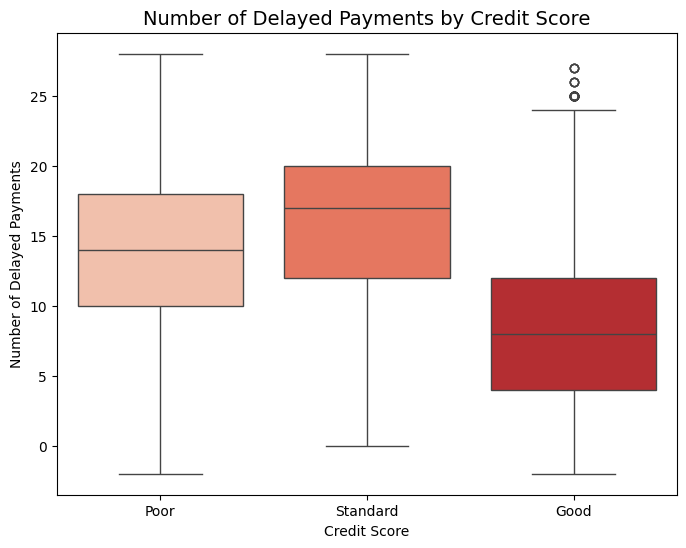

In [ ]:
# Assuming 'Num_of_Delayed_Payment' is a numerical column in df_plot.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Num_of_Delayed_Payment',
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='Reds'
)
plt.title('Number of Delayed Payments by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Number of Delayed Payments')
plt.show()

/tmp/ipython-input-2212466621.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


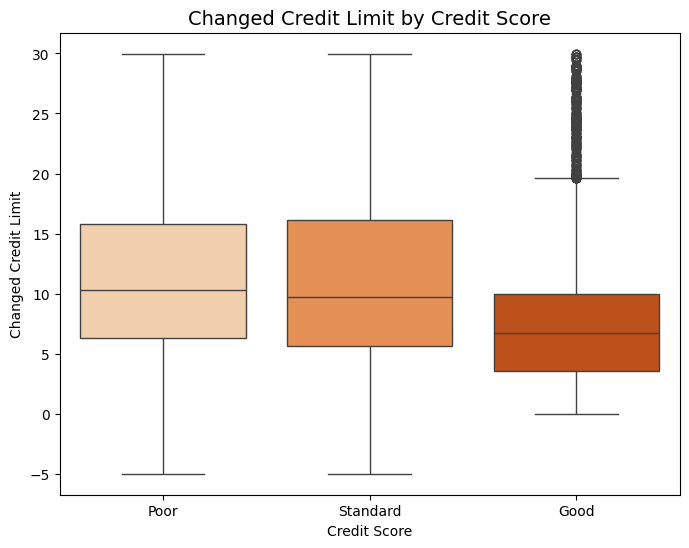

In [ ]:
# Assuming 'Changed_Credit_Limit' is a numerical column in df_plot.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Changed_Credit_Limit',
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='Oranges'
)
plt.title('Changed Credit Limit by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Changed Credit Limit')
plt.show()

/tmp/ipython-input-4049356100.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


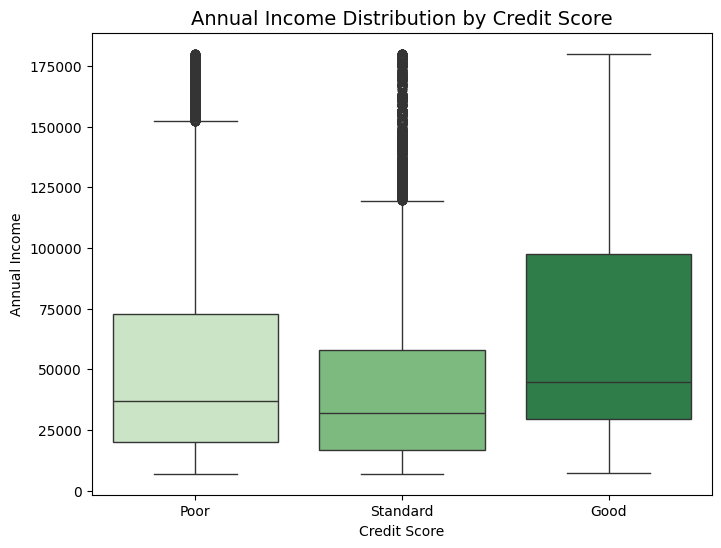

In [ ]:
# Assuming 'Annual_Income' is a numerical column in df_plot.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Annual_Income',
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='Greens'
)
plt.title('Annual Income Distribution by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

/tmp/ipython-input-4074662077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


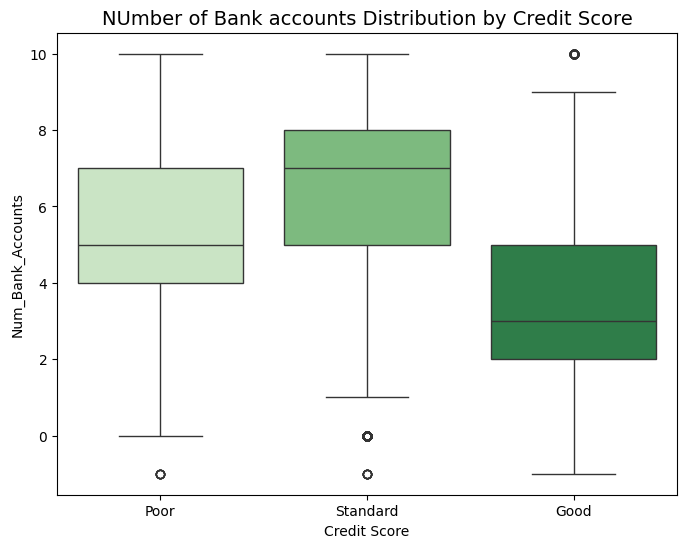

In [ ]:
# Assuming 'Num_Bank_Accounts' is a numerical column in df_plot.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Credit_Score_Label',
    y='Num_Bank_Accounts',
    data=df_plot,
    order=['Poor', 'Standard', 'Good'],
    palette='Greens'
)
plt.title('NUmber of Bank accounts Distribution by Credit Score', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Num_Bank_Accounts')
plt.show()